In [1]:
# !pip install onnxruntime
# !pip install rapidocr_onnxruntime
!pip install rapidocr_openvino

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 9.7 MB/s eta 0:00:00


In [ ]:
!pip install openvino

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import numpy as np
import pandas as pd
import cv2
import PIL.Image as Image
from datetime import datetime
from google.colab.patches import cv2_imshow
import warnings
warnings.filterwarnings('ignore')

In [4]:
import cv2
from rapidocr_openvino import RapidOCR
# from rapidocr_openvino import RapidOCR

rapid_ocr = RapidOCR(use_angle_cls = True, use_cuda = True)
# rapid_ocr = RapidOCR(config_path='custom.yaml')

In [24]:
cnt=0

['RAJHANS', 'Shrikhand', 'RAJHANS', 'NetWeight·500 gm Cup', 'haehanuk']


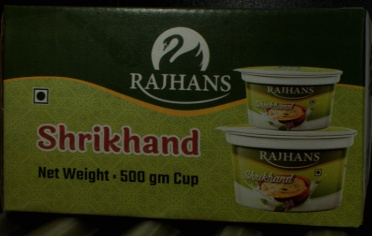

RAJHANS Shrikhand RAJHANS NetWeight·500 gm Cup haehanuk


In [25]:
path = '/content/drive/MyDrive/New Product/Images/New Images/'
img_path = path + sorted(os.listdir(path))[cnt]
#img_path ='/content/10.png'
img = cv2.imread(img_path)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result, elapse = rapid_ocr(img)
words = []
if result:
    for line in result:
        words.append(line[1])
print(words)
cnt+=1
text = ' '.join(words)
cv2_imshow(img)
print(text)

In [ ]:
# 'Net Weight·SoO gm Cup', 'Net Weight:5o0 mlPoly', 'Net Weight·SoO gm Cup', '0gx8Cups'

In [ ]:
words1 = [
    ['RAIHANS', '1977', 'Star', 'Pedha', '1', 'Net Weight:200g', '1'], ['1977'],
    ['AN1SO22:20CERTIFIEDPLAT', '2RAJHANS', 'Owned byFatmers,Trusted by Consume', 'S1NCE2977', 'PROCESSED CHEESE'],
    ['Rajhans', 'AMRAKHAND', 'Care PIL', 'Net Wt.:100gmx30cups'], ['E', 'Net WL:100gmx30cups'],
    ['Net Contains: 500gx8Cups', '口', 'CPRAJHANS', 'AMRAKHAND'], ['Net Contains:500gx8 Cups', 'D', 'PRTGTT', 'is', '22'],
    ['RAJHANS', 'AHANS!', 'Ghee', 'Ghee', 'Net Weight:500 ml JAR', 'Made From Cow Milk'],
    ['RAJHANS', 'RAUHAN', 'Cuuhhona', 'Shrikhand', 'RAJHANS', 'Net Weight·500 gm Cup', 'Shrikhand'], ['RAJHANS', 'Net Weight·500 gm Cup'],
    ['RAJHANS', 'RAJHANS', 'Shrikhand', 'Diahhama', 'NetWeight·50 gm Cup'],
    ['NET Welght 15kg', 'Date Of Packing', 'Batch No.', 'PRAJHANS', 'FSSL:10012022000431', 'FORANY', 'fssat', 'Ghee', 'PURE'],
    ['RAJHANS', 'RAHANS', 'Ghee', 'Ghee', 'Net Weight : 200 ml Poly', 'Made'],
    ['RAJHANS', '口', 'AJHANS', 'Ghee', 'Ghee', 'Made From Cow Mlllk', 'Net Weight: 200 ml JAR'],
    ['RAJHA', 'RAJHANS', 'Shrikhand', 'RAJHANS', 'Net Weight.250 gm Cup'], ['KAI', 'JG', 'RAJHANS', 'Chuikhann', 'NetWeight·250 gm Cup'],
    ['RAJHANS', 'Soan Papdi', 'Net Weight:250 gm Pack'], ['LShlhlolha'],
    ['RAJHANS', 'Shrikhand', 'RAJHANS', 'Chukhann', 'Net Weight.100 gm Cup'], ['RAJHANS', 'Shuikhand', 'Net Weight·100 gm Cup'],
    ['RAJHANS', '口', 'RAJHANS', 'Ghee', 'Ghee', 'Made From Cow Milk', 'Net Weight : 500 ml Poly'],
    ['RAJHANS', 'RAJHANS', 'Ghee', 'Ghee', 'Made From', 'Cow Milk', 'Net Weight: 100 ml JAR'],
    ['RAIHANS', '口', 'UHANY', 'Ghee', 'Ghee', 'Made From Cow Milk', 'Net Woight : 1 litre JAR'], ['RAJHANS', '口', 'AHANS', 'Ghee', 'Ghee', 'Madle From Cow Milke', 'Net Weight: 1uitre JAR'],
    ['Net Contains:', 'PRAJHANS', '250gx12Cups', 'AMRAKHAND'], ['Net ConLins:', '250gx12 Cups', '口', '2'],
    ['RAJHANS', '口', 'RAJHANS', 'Ghee', 'Ghee', 'Made Prom Cow Millkc', 'Net Weight : 1 Litre Poly'], ['RAJHANS', '口', 'RAJHANS', "Ghee'", 'Ghee', 'Made From Cow Mile', "Not We'ght : 1 litre Poly."],
    ['RAJHANS', 'Flavoured Milk', 'The taste ofnutriticn', 'Net Weight:200ml'], ['The taste cf nutriticn', 'Net Weight:200 ml'],
    ['Raihans', 'AMRAKHAND', 'Net Wt.:100gmx30cups', 'Care PnNo'], ['E', 'Care Ph.No.', 'Net WL:100gmx30cups', '02425-225816']
]

In [ ]:
def get_nums(statement):
    nums = []
    curr = ''
    #statement = statement.replace('i','1').replace('t','1')
    for i in range(len(statement)):
        if statement[i].isdigit() or (len(curr)>0 and statement[i]=='.'):
            curr+=statement[i]
            if i<len(statement)-1 and statement[i+1]=='.': continue

            if i==len(statement)-1 or not statement[i+1].isdigit():
                if curr.count('.')>1:
                    curr=''
                    continue
                if curr[-1]=='.':
                    curr = curr[:-1]
                if float(curr)==int(float(curr)): nums.append(int(float(curr)))
                else: nums.append(float(curr))
                curr=''
    return nums


def get_target_statement(words):
    for sentence in words:
        sentence = sentence.replace('5o0', '500').replace('So0', '500').replace('SoO', '500')
        #print(sentence)
        nums = get_nums(sentence)
        if len(nums)==0: continue
        if 'Net' in sentence or 'NET' in sentence or 'LITRE' in sentence.upper():
            return(sentence)
        if 'X' in sentence or 'x' in sentence or '×' in sentence:
            if 'CUPS' in sentence.upper() and 8 in nums: return('500g X 8CUPS')
            if 'CUPS' in sentence.upper() and 12 in nums: return('250g X 12CUPS')
            if 'CUPS' in sentence.upper() and 30 in nums: return('100g X 30CUPS')
            if len(nums)>=2: return(sentence)
    return None

def make_statement(target_statement):
    nums = get_nums(target_statement)
    if len(nums)>1:
        return(f'{nums[0]}g X {nums[1]}CUPS')
    if 'ml' in target_statement:
        return(f'{nums[0]}ml')
    if 'LITRE' in target_statement.upper():
        return(f'{nums[0]}L')
    if 'JAR' in target_statement.upper() or 'POLY' in target_statement.upper():
        if nums[0]>=50:
            return(f'{nums[0]}ml')
        return(f'{nums[0]}L')
    if nums[0]>=50:
        return(f'{nums[0]}g')
    return(f'{nums[0]}kg')

def get_name(entire_text):
    if 'AMRAKHAND' in entire_text:
        return('RAJHANS AMRAKHAND')
    if 'SHRIKHAND' in entire_text or 'IKHAND' in entire_text:
        return('RAJHANS SHRIKHAND')
    if 'GHEE' in entire_text:
        return('RAJHANS GHEE')
    if 'STAR' in entire_text and 'PEDHA' in entire_text:
        return('RAJHANS STAR PEDHA')
    if 'SOAN' in entire_text and 'PAPDI' in entire_text:
        return('RAJHANS SOAN PAPDI')
    if 'FLAVOURED'in entire_text and 'MILK' in entire_text:
        return('RAJHANS FLAVOURED MILK')
    if 'PROCESSED' in entire_text and 'CHEESE' in entire_text:
        return('RAJHANS PROCESSED CHEESE')
    return ''

In [ ]:
for words in words1:
    entire_text = ' '.join(words).upper()
    name = get_name(entire_text)
    if len(name)>0:
        print(name)

RAJHANS STAR PEDHA
RAJHANS PROCESSED CHEESE
RAJHANS AMRAKHAND
RAJHANS AMRAKHAND
RAJHANS GHEE
RAJHANS SHRIKHAND
RAJHANS SHRIKHAND
RAJHANS GHEE
RAJHANS GHEE
RAJHANS GHEE
RAJHANS SHRIKHAND
RAJHANS SOAN PAPDI
RAJHANS SHRIKHAND
RAJHANS SHRIKHAND
RAJHANS GHEE
RAJHANS GHEE
RAJHANS GHEE
RAJHANS GHEE
RAJHANS AMRAKHAND
RAJHANS GHEE
RAJHANS GHEE
RAJHANS FLAVOURED MILK
RAJHANS AMRAKHAND


In [ ]:
words1 = [['RAJHANS', 'Shrikhand', 'RAJHANS', 'Net Weight·5o0 gm Cup', 'oukhand']]
for words in words1:
    target_statement = get_target_statement(words)
    if target_statement is not None:
        print(target_statement,'->', make_statement(target_statement))

Net Weight·500 gm Cup -> 500g
